In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history[f"val_{metric}"], "")
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, f"val_{metric}"])
  plt.show()

In [4]:
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5D86S6/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5D86S6/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5D86S6/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
encoder = info.features["text"].encoder

In [6]:
print(f"Vocabulary size: {encoder.vocab_size}")

Vocabulary size: 8185


In [7]:
sample_string = "Hello TensorFlow."

encoded_string = encoder.encode(sample_string)
print(f"Encoded string is {encoded_string}")

original_string = encoder.decode(encoded_string)
print(f"The original string is: \"{original_string}\"")

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string is: "Hello TensorFlow."


In [10]:
assert original_string == sample_string

In [11]:
for index in encoded_string:
  print(f"{index} ----> {encoder.decode([index])}")

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [13]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)                             
])

In [33]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=["accuracy"])

In [34]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 44s 112ms/step - loss: 0.6528 - accuracy: 0.5516 - val_loss: 0.4548 - val_accuracy: 0.7849
Epoch 2/10
391/391 [==============================] - 43s 110ms/step - loss: 0.3591 - accuracy: 0.8474 - val_loss: 0.3370 - val_accuracy: 0.8635
Epoch 3/10
391/391 [==============================] - 43s 111ms/step - loss: 0.2616 - accuracy: 0.8984 - val_loss: 0.3301 - val_accuracy: 0.8620
Epoch 4/10
391/391 [==============================] - 43s 111ms/step - loss: 0.2145 - accuracy: 0.9202 - val_loss: 0.3283 - val_accuracy: 0.8708
Epoch 5/10
391/391 [==============================] - 44s 112ms/step - loss: 0.1880 - accuracy: 0.9329 - val_loss: 0.3268 - val_accuracy: 0.8724
Epoch 6/10
391/391 [==============================] - 43s 111ms/step - loss: 0.1642 - accuracy: 0.9434 - val_loss: 0.3523 - val_accuracy: 0.8682
Epoch 7/10
391/391 [==============================] - 44s 112ms/step - loss: 0.1517 - accuracy: 0.9475 - val_loss: 0.3613 - val_ac

In [35]:
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

391/391 [==============================] - 18s 47ms/step - loss: 0.4044 - accuracy: 0.8591
Test Loss: 0.4044490158557892
Test Accuracy: 0.8591200113296509


In [17]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [18]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [19]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions =  sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.20586735]]


In [20]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[0.02935748]]


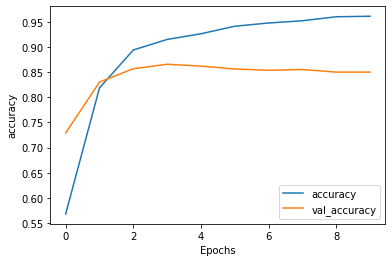

In [22]:
plot_graphs(history, "accuracy")

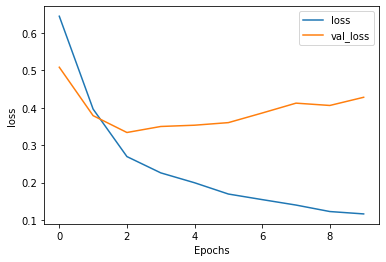

In [23]:
plot_graphs(history, "loss")

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)                             
])

In [25]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=["accuracy"])

In [26]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 75s 193ms/step - loss: 0.6655 - accuracy: 0.5383 - val_loss: 0.5028 - val_accuracy: 0.7521
Epoch 2/10
391/391 [==============================] - 75s 192ms/step - loss: 0.4085 - accuracy: 0.8270 - val_loss: 0.3691 - val_accuracy: 0.8417
Epoch 3/10
391/391 [==============================] - 75s 192ms/step - loss: 0.2961 - accuracy: 0.8882 - val_loss: 0.3410 - val_accuracy: 0.8500
Epoch 4/10
391/391 [==============================] - 74s 190ms/step - loss: 0.2416 - accuracy: 0.9161 - val_loss: 0.3466 - val_accuracy: 0.8510
Epoch 5/10
391/391 [==============================] - 74s 190ms/step - loss: 0.2050 - accuracy: 0.9316 - val_loss: 0.3494 - val_accuracy: 0.8672
Epoch 6/10
391/391 [==============================] - 73s 187ms/step - loss: 0.1755 - accuracy: 0.9451 - val_loss: 0.3923 - val_accuracy: 0.8552
Epoch 7/10
391/391 [==============================] - 73s 187ms/step - loss: 0.1566 - accuracy: 0.9521 - val_loss: 0.4283 - val_ac

In [27]:
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

391/391 [==============================] - 33s 84ms/step - loss: 0.5770 - accuracy: 0.8166
Test Loss: 0.5769903063774109
Test Accuracy: 0.8165599703788757


In [28]:
sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-2.7690837]]


In [29]:
sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-4.341692]]


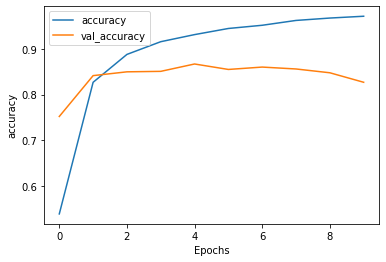

In [30]:
plot_graphs(history, 'accuracy')

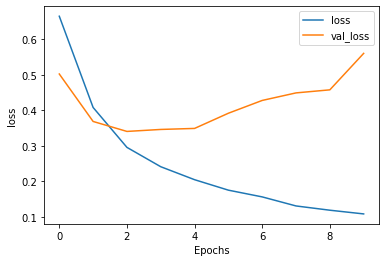

In [31]:
plot_graphs(history, 'loss')